# I. Import thư viện

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from joblib import dump, load

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

# II. Đọc dữ liệu

In [14]:
#df = pd.read_csv('/content/drive/MyDrive/DS317/df.csv')
df = pd.read_csv('D:\Learning\Semester 1 year 4\DS317\Project\Data\Preprocessed_Data_IncludeCTN_For_Models.csv')

# III. Xây dựng mô hình




In [15]:
X = df.drop(columns={'xeploai'})
y = df['xeploai']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
labels = ['Rớt', 'Trung bình', 'Trung bình khá', 'Khá', 'Giỏi', 'Xuất sắc']

In [18]:
def visualization(y_test, y_pred):
  print('Weighted f1_score: ',f1_score(y_test, y_pred, average='weighted'))
  print('Macro f1_score: ',f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [19]:
def make_results_df(orginal, res_list):
    df_res = pd.DataFrame({
        'Accuracy': [accuracy_score(orginal, u) for u in res_list],
        'Precision': [precision_score(orginal, u, average='macro') for u in res_list],
        'Recall': [recall_score(orginal, u, average='macro') for u in res_list],
        'F1-macro': [f1_score(orginal, u, average='macro') for u in res_list]
    }, index=['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
    return df_res

In [20]:
# Dữ liệu 2 năm học đầu
X_train = X_train.drop(columns=['diemnamhoc2', 'diemnamhoc3', 'diem_3_5', 'drlnam2', 'drlnam3', 'drl_3_5', 'sotc_rot2', 'sotc_rot3', 'rotmon_3_5', 'tctichluy2', 'tctichluy2', 'tctichluy3','tc_tichluy_3_5'])
X_test = X_test.drop(columns=['diemnamhoc2', 'diemnamhoc3', 'diem_3_5', 'drlnam2', 'drlnam3', 'drl_3_5', 'sotc_rot2', 'sotc_rot3', 'rotmon_3_5', 'tctichluy2', 'tctichluy3','tc_tichluy_3_5'])

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 5223 to 7270
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   namsinh        6260 non-null   float64
 1   gioitinh       6260 non-null   float64
 2   noisinh        6260 non-null   int64  
 3   khoa           6260 non-null   int64  
 4   hedt           6260 non-null   int64  
 5   khoahoc        6260 non-null   float64
 6   chuyennganh2   6260 non-null   int64  
 7   tinhtrang      6260 non-null   float64
 8   diachi_tinhtp  6260 non-null   int64  
 9   diemnamhoc1    6260 non-null   float64
 10  drlnam1        6260 non-null   float64
 11  dien_tt        6260 non-null   int64  
 12  diem_tt        6260 non-null   float64
 13  sotc_rot1      6260 non-null   float64
 14  tctichluy1     6260 non-null   float64
 15  socc_tienganh  6260 non-null   float64
 16  tienganh       6260 non-null   int64  
 17  canhcao        6260 non-null   float64
dtypes: fl

In [22]:
X_train['tinhtrang'].value_counts()

1.0    3492
3.0    1247
5.0     907
8.0     298
2.0     243
4.0      66
6.0       7
Name: tinhtrang, dtype: int64

## 1. Xét năm học đầu

### a) Decision Tree

In [23]:
model_dt = DecisionTreeClassifier(random_state=42)

In [24]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

Weighted f1_score:  0.8838669803030883
Macro f1_score:  0.6032557575539145
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1165
           1       0.88      0.83      0.86        18
           2       0.38      0.32      0.35        50
           3       0.69      0.71      0.70       227
           4       0.56      0.59      0.57       102
           5       0.12      0.25      0.17         4

    accuracy                           0.88      1566
   macro avg       0.60      0.61      0.60      1566
weighted avg       0.89      0.88      0.88      1566



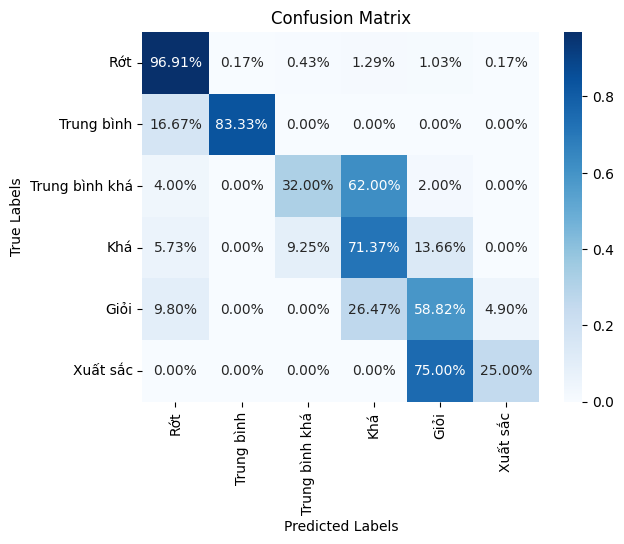

In [25]:
visualization(y_test, y_pred_dt)

### b) Random Forest

In [26]:
model_rf = RandomForestClassifier(random_state=42)

In [27]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9011595683358102
Macro f1_score:  0.5958362790896894
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.55      0.22      0.31        50
           3       0.71      0.85      0.77       227
           4       0.60      0.65      0.62       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.62      0.60      0.60      1566
weighted avg       0.90      0.90      0.90      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

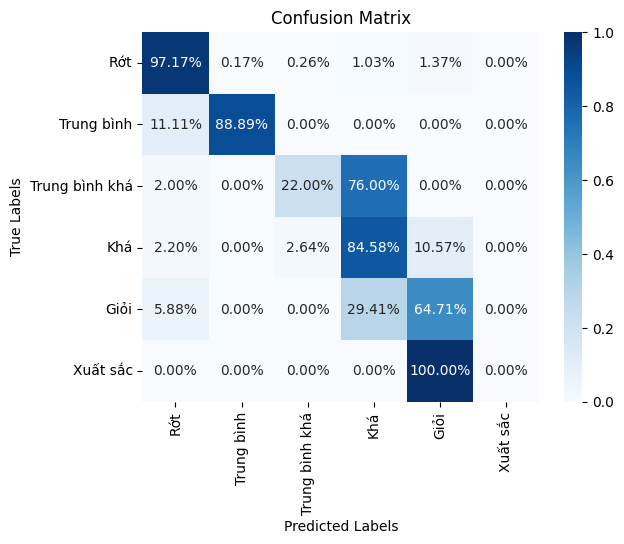

In [28]:
visualization(y_test, y_pred_rf)

### c) XGBoost

In [29]:
model_xg = XGBClassifier(random_state=42)

In [30]:
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9045319834786112
Macro f1_score:  0.6184187736729263
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.58      0.36      0.44        50
           3       0.72      0.81      0.76       227
           4       0.61      0.67      0.64       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.63      0.62      0.62      1566
weighted avg       0.91      0.90      0.90      1566



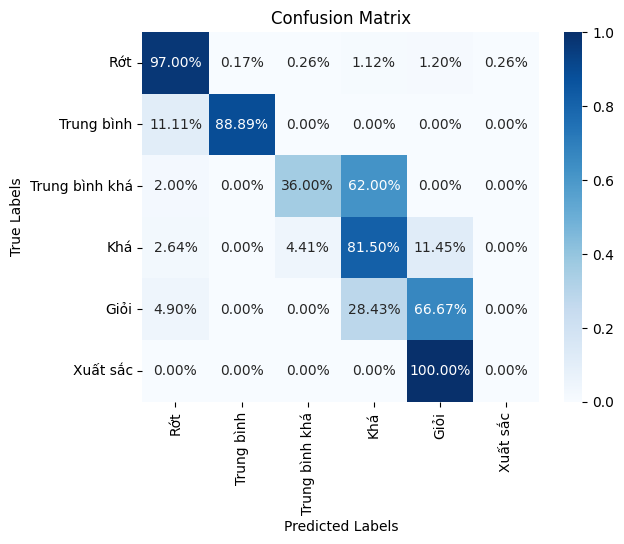

In [31]:
visualization(y_test, y_pred_xg)

### d) LightGBM

In [32]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [33]:
model_lgb.fit(X_train, y_train)
y_pred_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 18
[LightGBM] [Info] Start training from score -0.276878
[LightGBM] [Info] Start training from score -4.209336
[LightGBM] [Info] Start training from score -3.673031
[LightGBM] [Info] Start training from score -1.945112
[LightGBM] [Info] Start training from score -2.861402
[LightGBM] [Info] Start training from score -6.544711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Weighted f1_score:  0.9042288156114551
Macro f1_score:  0.6091518434256006
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1165
           1       0.88      0.78      0.82        18
           2       0.61      0.38      0.47        50
           3       0.73      0.82      0.77       227
           4       0.59      0.64      0.61       102
           5       0.00      0.00      0.00         4

    accuracy                           0.91      1566
   macro avg       0.63      0.60      0.61      1566
weighted avg       0.91      0.91      0.90      1566



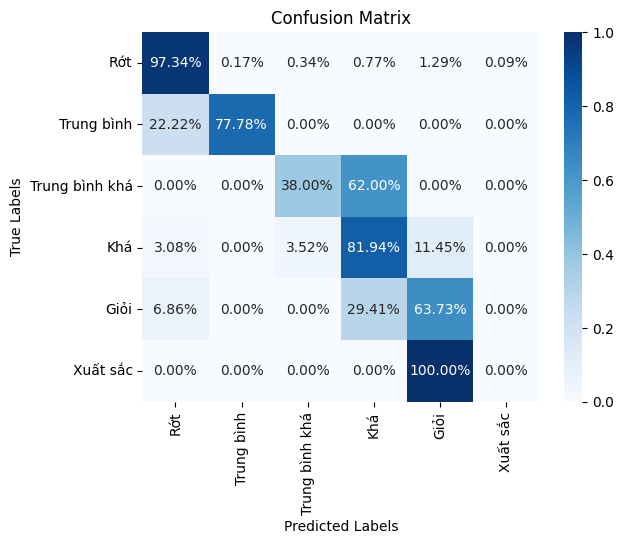

In [34]:
visualization(y_test, y_pred_lg)

### e) CatBoost

In [35]:
model_cb = CatBoostClassifier(random_state=42)

In [36]:
model_cb.fit(X_train, y_train)
y_pred_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.4805246	total: 94.9ms	remaining: 1m 34s
1:	learn: 1.2663018	total: 106ms	remaining: 52.9s
2:	learn: 1.1092419	total: 115ms	remaining: 38.2s
3:	learn: 0.9901677	total: 127ms	remaining: 31.5s
4:	learn: 0.8930908	total: 136ms	remaining: 27s
5:	learn: 0.8188207	total: 144ms	remaining: 23.8s
6:	learn: 0.7508427	total: 154ms	remaining: 21.8s
7:	learn: 0.6913427	total: 164ms	remaining: 20.3s
8:	learn: 0.6427514	total: 173ms	remaining: 19s
9:	learn: 0.6010933	total: 181ms	remaining: 17.9s
10:	learn: 0.5623896	total: 190ms	remaining: 17s
11:	learn: 0.5280642	total: 200ms	remaining: 16.5s
12:	learn: 0.4986174	total: 213ms	remaining: 16.1s
13:	learn: 0.4718501	total: 224ms	remaining: 15.7s
14:	learn: 0.4498421	total: 235ms	remaining: 15.4s
15:	learn: 0.4282339	total: 246ms	remaining: 15.1s
16:	learn: 0.4076993	total: 262ms	remaining: 15.2s
17:	learn: 0.3888944	total: 276ms	remaining: 15s
18:	learn: 0.3731134	total: 287ms	remaining: 14.8s
19:	learn: 0.3575

Weighted f1_score:  0.9062845547576124
Macro f1_score:  0.6215133673513187
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.63      0.38      0.48        50
           3       0.72      0.82      0.77       227
           4       0.58      0.65      0.61       102
           5       0.00      0.00      0.00         4

    accuracy                           0.91      1566
   macro avg       0.64      0.62      0.62      1566
weighted avg       0.91      0.91      0.91      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

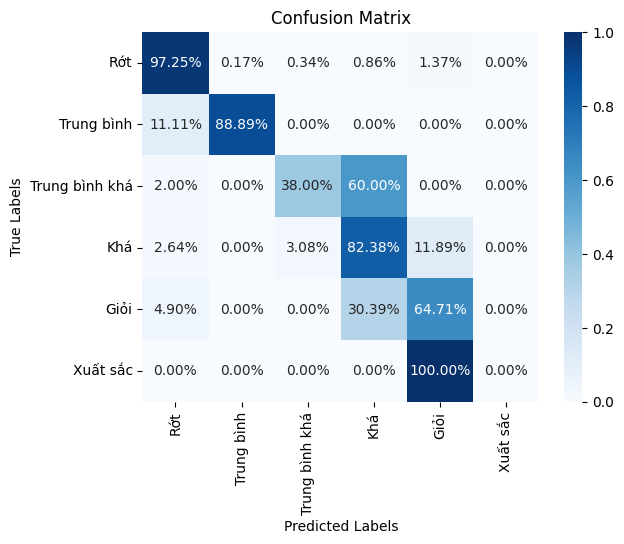

In [37]:
visualization(y_test, y_pred_cb)

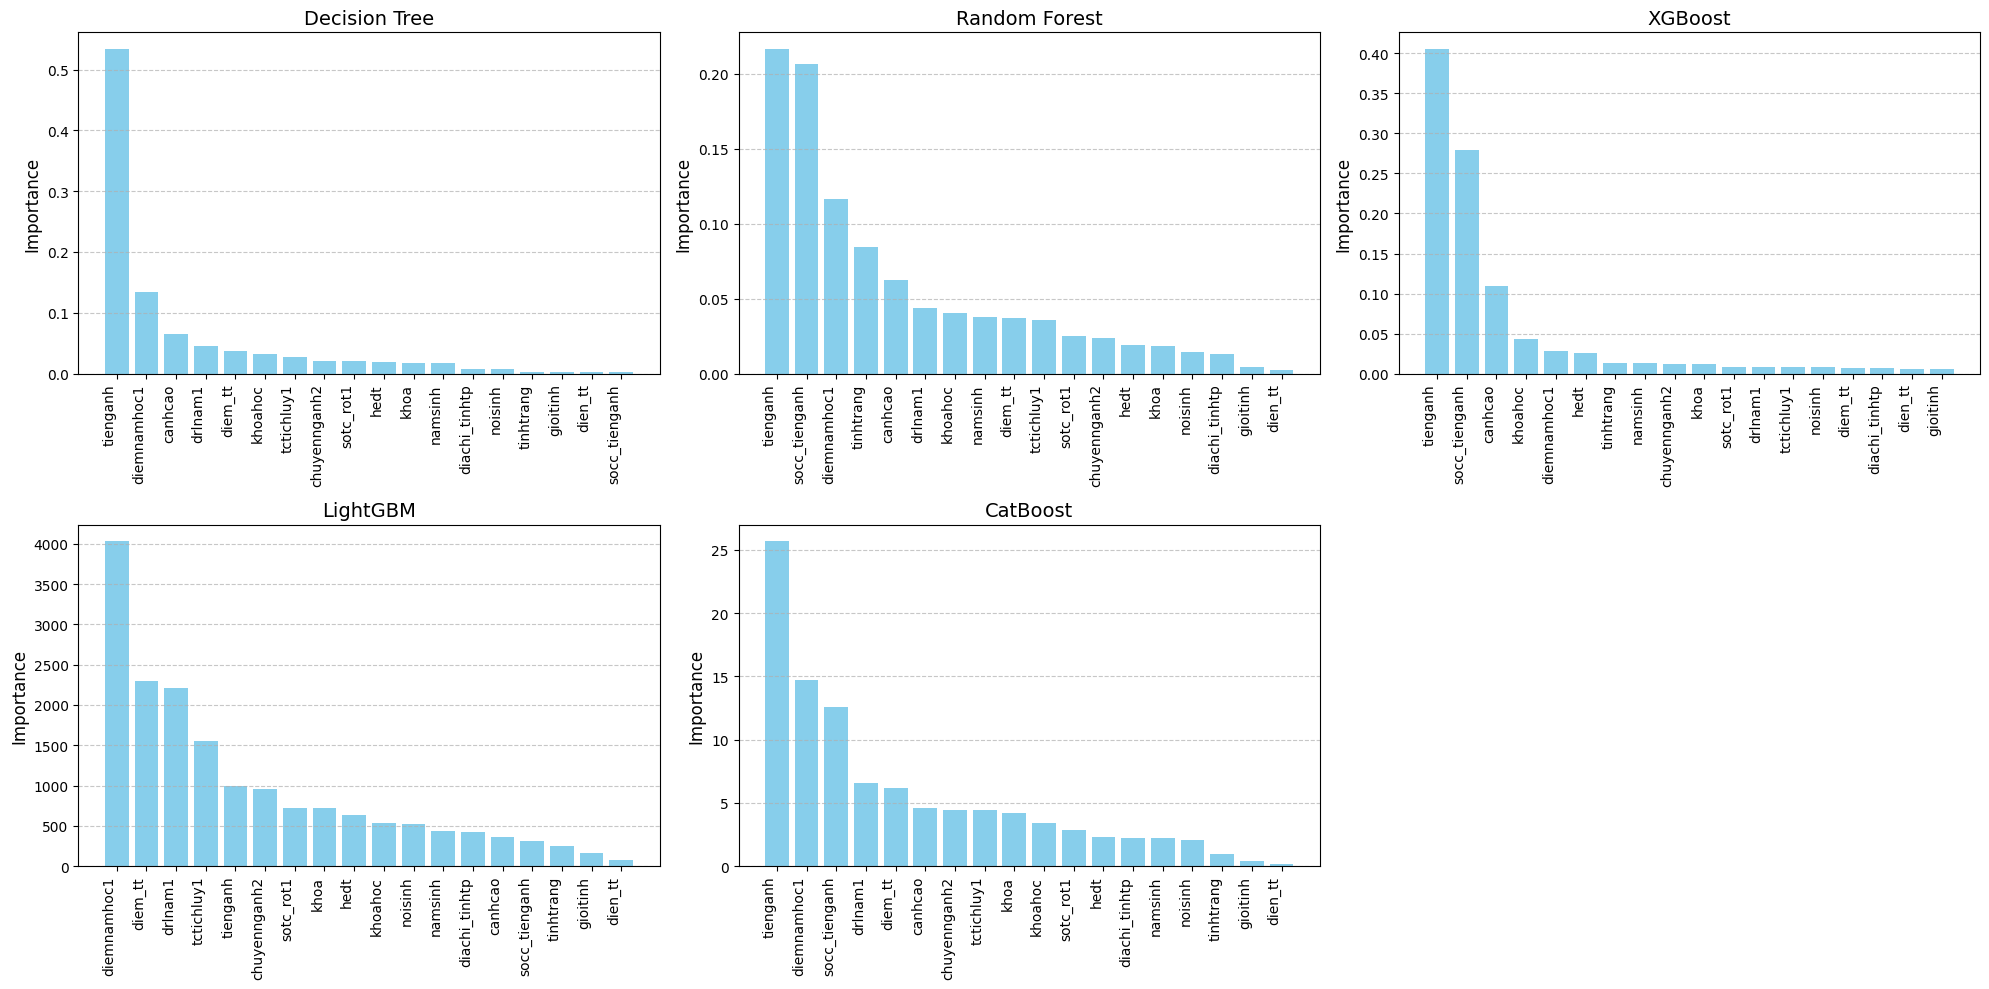

In [38]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# IV. Xây dựng mô hình với cân bằng nhãn

## 1. Sử dụng SMOTE

In [39]:
y_train.value_counts()

0    4746
3     895
4     358
2     159
1      93
5       9
Name: xeploai, dtype: int64

In [40]:
k_neighbors_config = {
    5: 2,  
    1: 5,  
    2: 7, 
    3: 10, 
    4: 10
}

smote_dict = {}
for label, k_neighbors in k_neighbors_config.items():
    smote_dict[label] = SMOTE(k_neighbors=k_neighbors)

X_train_resampled, y_train_resampled = X_train, y_train
for label, smote in smote_dict.items():
    if label in k_neighbors_config:
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

In [41]:
#smote = SMOTE(k_neighbors=3, random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [42]:
y_train_resampled.value_counts()

0    4746
3    4746
1    4746
2    4746
4    4746
5    4746
Name: xeploai, dtype: int64

### 1.1 Xét năm học đầu

#### a) Decision Tree

In [43]:
model_dt = DecisionTreeClassifier(random_state=42)

In [44]:
model_dt.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_dt = model_dt.predict(X_test)

Weighted f1_score:  0.8873327858491399
Macro f1_score:  0.6309279760364623
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1165
           1       0.89      0.89      0.89        18
           2       0.38      0.36      0.37        50
           3       0.68      0.71      0.69       227
           4       0.57      0.66      0.61       102
           5       0.25      0.25      0.25         4

    accuracy                           0.89      1566
   macro avg       0.63      0.64      0.63      1566
weighted avg       0.89      0.89      0.89      1566



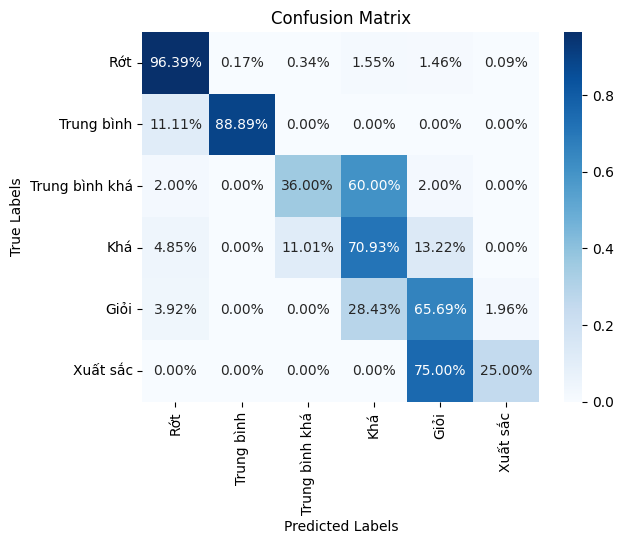

In [45]:
visualization(y_test, y_pred_resampled_dt)

#### b) Random Forest

In [46]:
model_rf = RandomForestClassifier(random_state=42)

In [47]:
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9003252862195047
Macro f1_score:  0.6607485498660899
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.53      0.34      0.41        50
           3       0.69      0.82      0.75       227
           4       0.57      0.64      0.60       102
           5       0.50      0.25      0.33         4

    accuracy                           0.90      1566
   macro avg       0.69      0.65      0.66      1566
weighted avg       0.91      0.90      0.90      1566



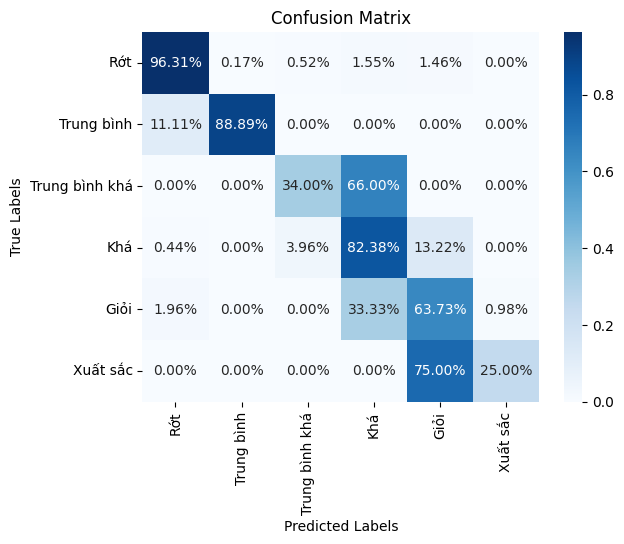

In [48]:
visualization(y_test, y_pred_resampled_rf)

#### c) XGBoost

In [49]:
model_xg = XGBClassifier(random_state=42)

In [50]:
model_xg.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_xg = model_xg.predict(X_test)

Weighted f1_score:  0.8948629882013318
Macro f1_score:  0.6411341276687336
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.47      0.34      0.40        50
           3       0.69      0.76      0.72       227
           4       0.55      0.62      0.58       102
           5       0.25      0.25      0.25         4

    accuracy                           0.89      1566
   macro avg       0.64      0.65      0.64      1566
weighted avg       0.90      0.89      0.89      1566



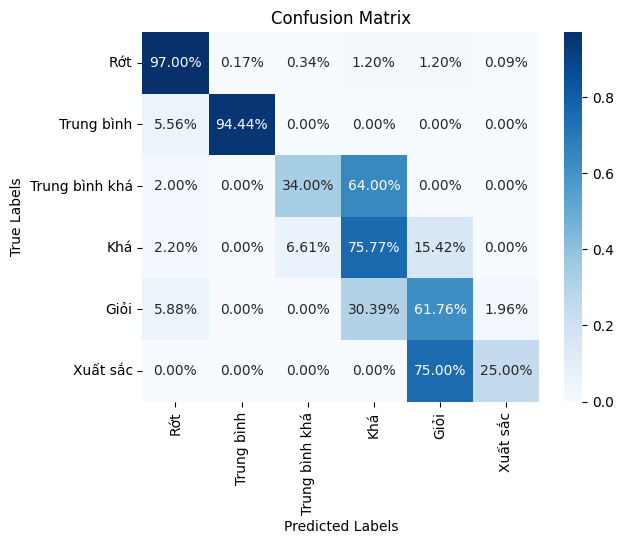

In [51]:
visualization(y_test, y_pred_resampled_xg)

#### d) LightGBM

In [52]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [53]:
model_lgb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2612
[LightGBM] [Info] Number of data points in the train set: 28476, number of used features: 18
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Weighted f1_score:  0.9026391079180687
Macro f1_score:  0.6596916302034274
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.57      0.42      0.48        50
           3       0.72      0.78      0.75       227
           4       0.57      0.65      0.61       102
           5       0.25      0.25      0.25         4

    accuracy                           0.90      1566
   macro avg       0.66      0.66      0.66      1566
weighted avg       0.91      0.90      0.90      1566



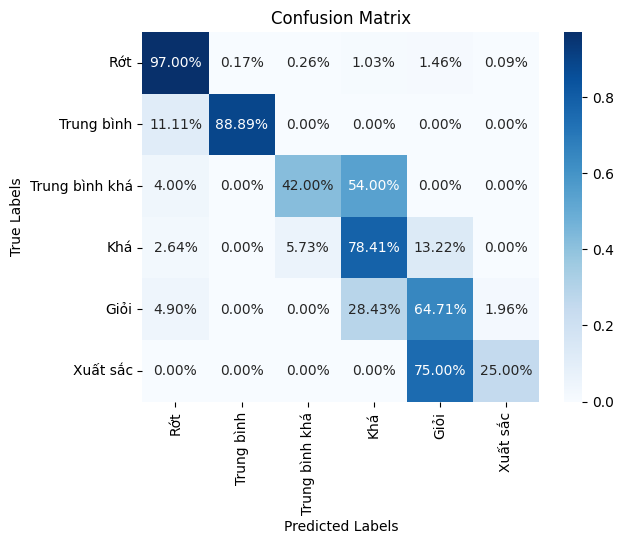

In [54]:
visualization(y_test, y_pred_resampled_lg)

#### e) CatBoost

In [55]:
model_cb = CatBoostClassifier(random_state=42)

In [56]:
model_cb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_cb = model_cb.predict(X_test)

Learning rate set to 0.093865
0:	learn: 1.4818628	total: 124ms	remaining: 2m 3s
1:	learn: 1.2855889	total: 184ms	remaining: 1m 32s
2:	learn: 1.1410507	total: 227ms	remaining: 1m 15s
3:	learn: 1.0288778	total: 267ms	remaining: 1m 6s
4:	learn: 0.9390344	total: 312ms	remaining: 1m 2s
5:	learn: 0.8632236	total: 354ms	remaining: 58.6s
6:	learn: 0.8015710	total: 398ms	remaining: 56.4s
7:	learn: 0.7456657	total: 442ms	remaining: 54.8s
8:	learn: 0.6970095	total: 480ms	remaining: 52.8s
9:	learn: 0.6559345	total: 530ms	remaining: 52.5s
10:	learn: 0.6206764	total: 595ms	remaining: 53.5s
11:	learn: 0.5891642	total: 645ms	remaining: 53.1s
12:	learn: 0.5615732	total: 688ms	remaining: 52.2s
13:	learn: 0.5357242	total: 733ms	remaining: 51.6s
14:	learn: 0.5127669	total: 781ms	remaining: 51.3s
15:	learn: 0.4928282	total: 829ms	remaining: 51s
16:	learn: 0.4741119	total: 869ms	remaining: 50.3s
17:	learn: 0.4566386	total: 922ms	remaining: 50.3s
18:	learn: 0.4413526	total: 957ms	remaining: 49.4s
19:	learn: 

Weighted f1_score:  0.9059586846106888
Macro f1_score:  0.6793659165776202
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.74      0.94      0.83        18
           2       0.54      0.44      0.48        50
           3       0.73      0.81      0.77       227
           4       0.58      0.67      0.62       102
           5       1.00      0.25      0.40         4

    accuracy                           0.90      1566
   macro avg       0.76      0.68      0.68      1566
weighted avg       0.91      0.90      0.91      1566



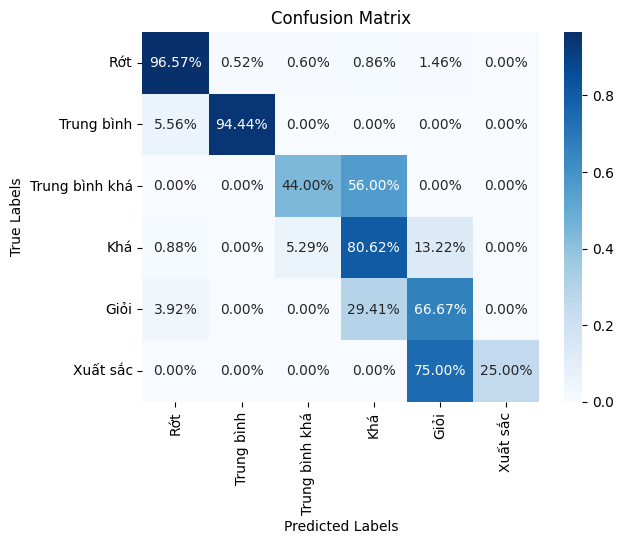

In [57]:
visualization(y_test, y_pred_resampled_cb)

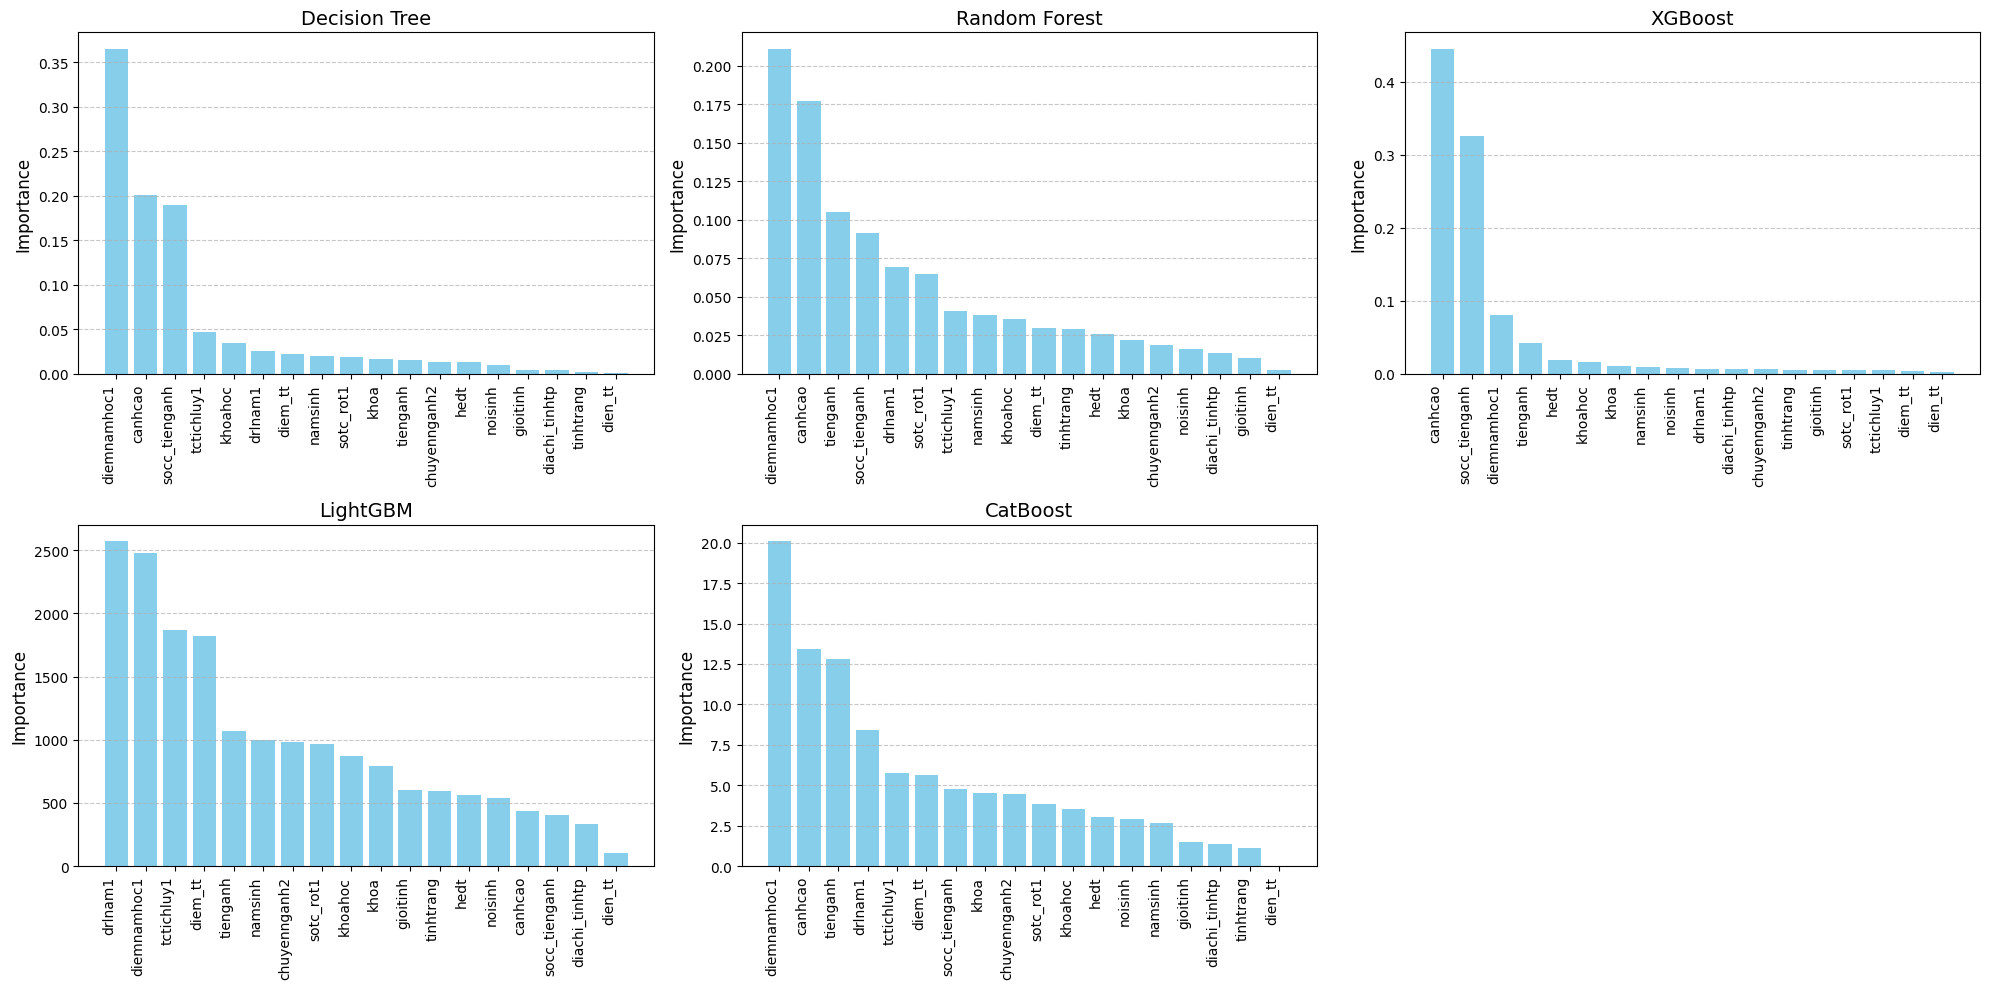

In [58]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train_resampled.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

## 2. Sử dụng đánh trọng số nhãn

In [59]:
y_train.value_counts()

0    4746
3     895
4     358
2     159
1      93
5       9
Name: xeploai, dtype: int64

In [60]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2, 3, 4, 5]),
    y=y_train
)

In [61]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [62]:
class_weight_dict = {i: w for i, w in enumerate(class_weights)}
print("Trọng số nhãn:", class_weight_dict)

Trọng số nhãn: {0: 0.21983424638291896, 1: 11.21863799283154, 2: 6.561844863731656, 3: 1.1657355679702048, 4: 2.914338919925512, 5: 115.92592592592592}


### 2.1 Xét năm học đầu

#### a) Decision Tree

In [63]:
model_dt = DecisionTreeClassifier(class_weight=class_weight_dict, random_state=42)

In [64]:
model_dt.fit(X_train, y_train)
y_pred_ts_dt = model_dt.predict(X_test)

Weighted f1_score:  0.8850792527496951
Macro f1_score:  0.6328932187947409
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1165
           1       0.89      0.89      0.89        18
           2       0.40      0.34      0.37        50
           3       0.70      0.73      0.71       227
           4       0.57      0.58      0.58       102
           5       0.33      0.25      0.29         4

    accuracy                           0.89      1566
   macro avg       0.64      0.63      0.63      1566
weighted avg       0.88      0.89      0.89      1566



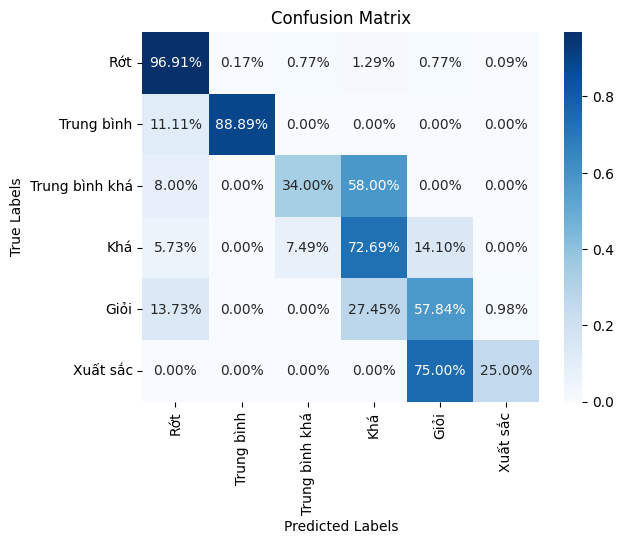

In [65]:
visualization(y_test, y_pred_ts_dt)

#### b) Random Forest

In [66]:
model_rf = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

In [67]:
model_rf.fit(X_train, y_train)
y_pred_ts_rf = model_rf.predict(X_test)

Weighted f1_score:  0.8986130255367777
Macro f1_score:  0.583218226874045
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.62      0.16      0.25        50
           3       0.68      0.88      0.76       227
           4       0.61      0.62      0.61       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.63      0.59      0.58      1566
weighted avg       0.91      0.90      0.90      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

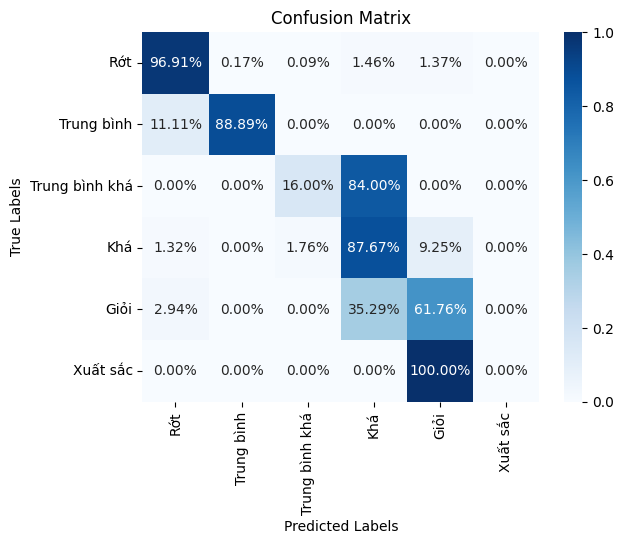

In [68]:
visualization(y_test, y_pred_ts_rf)

#### c) XGBoost

In [69]:
model_xg = XGBClassifier(random_state=42)

In [70]:
model_xg.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_xg = model_xg.predict(X_test)

Weighted f1_score:  0.904582449531705
Macro f1_score:  0.6295952926563356
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1165
           1       0.86      1.00      0.92        18
           2       0.50      0.48      0.49        50
           3       0.74      0.78      0.76       227
           4       0.58      0.70      0.63       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.61      0.65      0.63      1566
weighted avg       0.91      0.90      0.90      1566



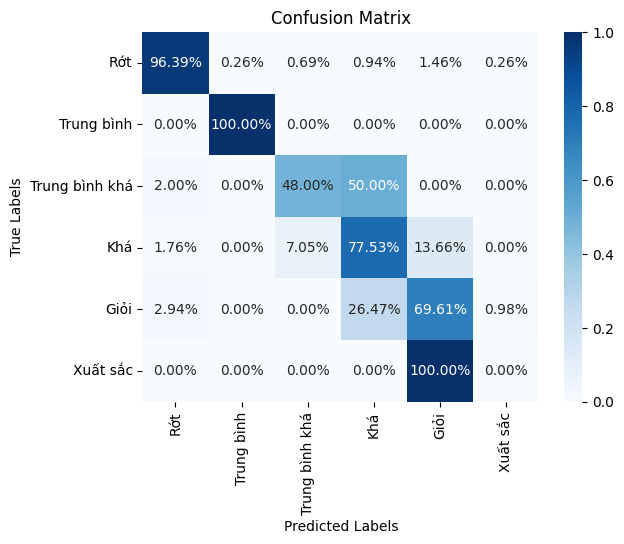

In [71]:
visualization(y_test, y_pred_ts_xg)

#### d) LightGBM

In [72]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [73]:
model_lgb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 18
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Weighted f1_score:  0.905694471127797
Macro f1_score:  0.6345877284727869
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.51      0.52      0.51        50
           3       0.74      0.77      0.76       227
           4       0.59      0.71      0.64       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.62      0.65      0.63      1566
weighted avg       0.91      0.90      0.91      1566



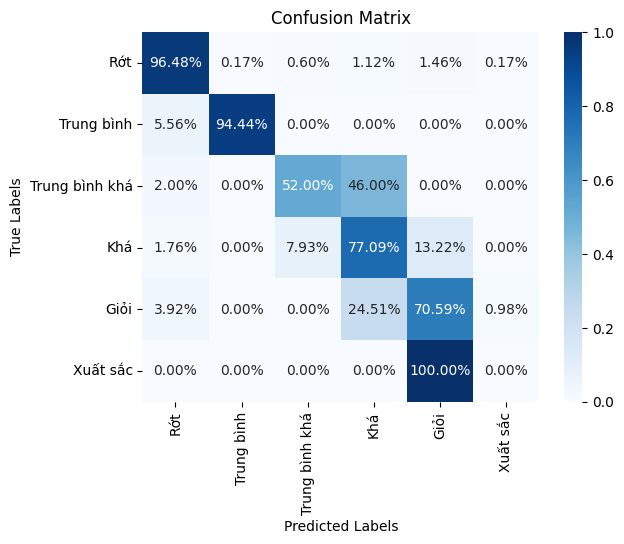

In [74]:
visualization(y_test, y_pred_ts_lg)

#### e) CatBoost

In [75]:
model_cb = CatBoostClassifier(random_state=42)

In [76]:
model_cb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.5850080	total: 16.5ms	remaining: 16.4s
1:	learn: 1.4030704	total: 29.7ms	remaining: 14.8s
2:	learn: 1.2642483	total: 41.8ms	remaining: 13.9s
3:	learn: 1.1572531	total: 53.3ms	remaining: 13.3s
4:	learn: 1.0680816	total: 64.9ms	remaining: 12.9s
5:	learn: 1.0183275	total: 78.4ms	remaining: 13s
6:	learn: 0.9564789	total: 89.4ms	remaining: 12.7s
7:	learn: 0.9012416	total: 100ms	remaining: 12.4s
8:	learn: 0.8515947	total: 112ms	remaining: 12.3s
9:	learn: 0.8145537	total: 123ms	remaining: 12.2s
10:	learn: 0.7783638	total: 136ms	remaining: 12.2s
11:	learn: 0.7429677	total: 147ms	remaining: 12.1s
12:	learn: 0.7179556	total: 160ms	remaining: 12.1s
13:	learn: 0.6935239	total: 171ms	remaining: 12s
14:	learn: 0.6817331	total: 184ms	remaining: 12.1s
15:	learn: 0.6519446	total: 194ms	remaining: 11.9s
16:	learn: 0.6295589	total: 203ms	remaining: 11.8s
17:	learn: 0.6128005	total: 215ms	remaining: 11.8s
18:	learn: 0.5958392	total: 229ms	remaining: 11.8s
19:	lear

Weighted f1_score:  0.8990093182898743
Macro f1_score:  0.6626125129961447
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1165
           1       0.69      1.00      0.82        18
           2       0.54      0.56      0.55        50
           3       0.73      0.78      0.75       227
           4       0.53      0.69      0.60       102
           5       0.33      0.25      0.29         4

    accuracy                           0.89      1566
   macro avg       0.64      0.70      0.66      1566
weighted avg       0.91      0.89      0.90      1566



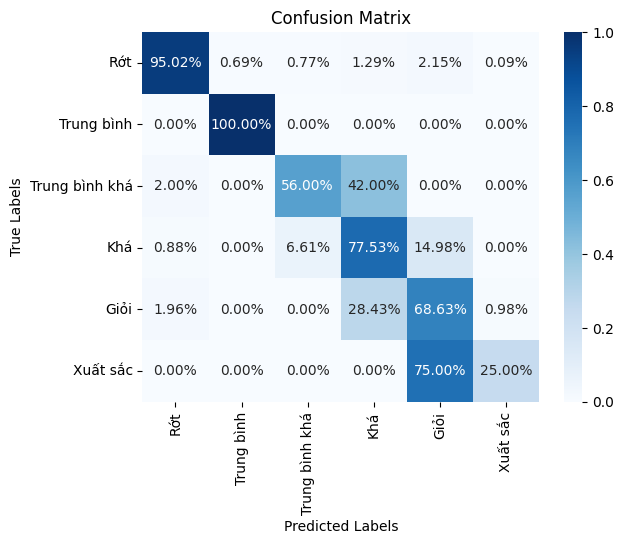

In [77]:
visualization(y_test, y_pred_ts_cb)

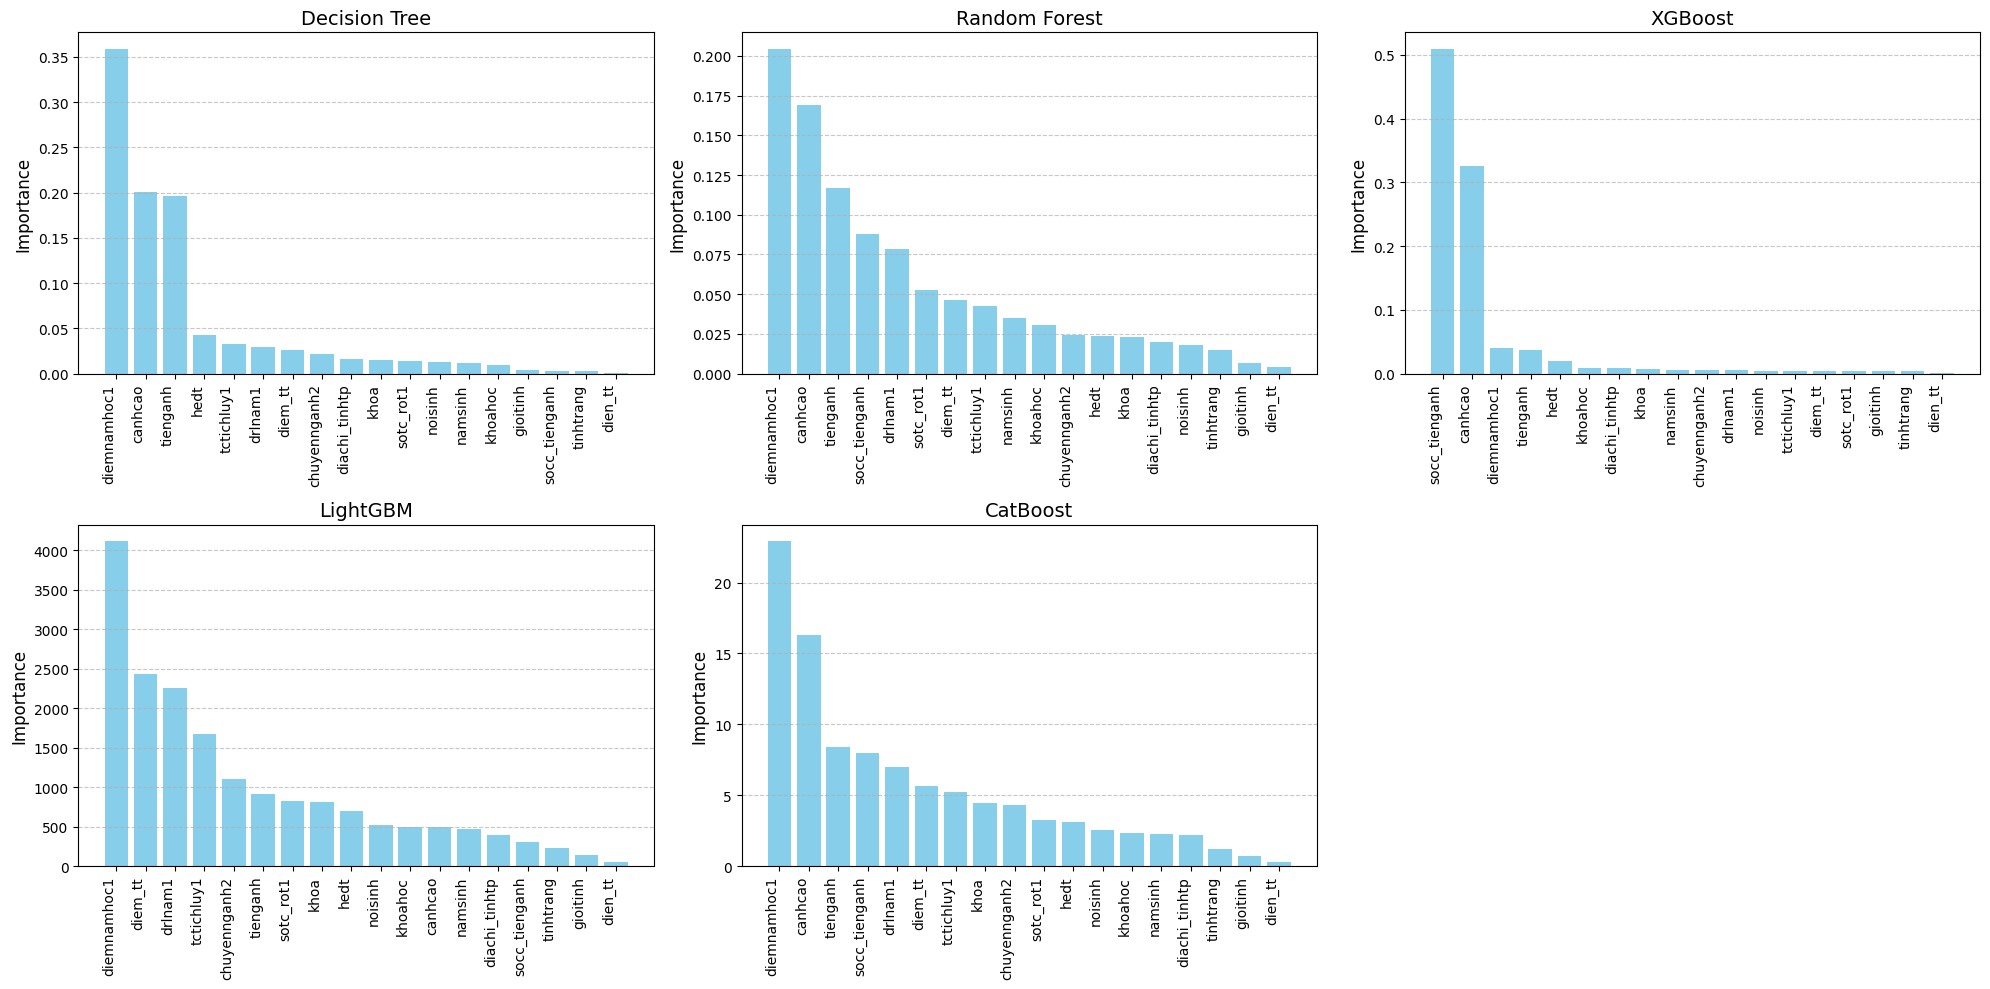

In [78]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# V. Kết quả

## 1. Không xử lý mất cân bằng

In [79]:
df_res = make_results_df(y_test, [y_pred_dt, y_pred_rf, y_pred_xg, y_pred_lg, y_pred_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
df_res

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.883142,0.602369,0.612387,0.603256
Random Forest,0.904853,0.622092,0.595573,0.595836
XGBoost,0.904853,0.630249,0.616748,0.618419
LightGBM,0.905492,0.631625,0.597968,0.609152
CatBoost,0.907407,0.636482,0.618711,0.621513


## 2. SMOTE

In [81]:
df_res_sm = make_results_df(y_test, [y_pred_resampled_dt, y_pred_resampled_rf, y_pred_resampled_xg, y_pred_resampled_lg, y_pred_resampled_cb])

In [82]:
df_res_sm

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.885057,0.625060,0.638159,0.630928
Random Forest,0.899106,0.694737,0.650504,0.660749
XGBoost,0.893997,0.640696,0.646626,0.641134
LightGBM,0.901660,0.664316,0.660008,0.659692
CatBoost,0.904215,0.762481,0.678824,0.679366


## 3. Đánh trọng số nhãn

In [83]:
df_res_ts = make_results_df(y_test, [y_pred_ts_dt, y_pred_ts_rf, y_pred_ts_xg, y_pred_ts_lg, y_pred_ts_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
df_res_ts

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.885696,0.643032,0.625549,0.632893
Random Forest,0.903576,0.629980,0.585381,0.583218
XGBoost,0.901660,0.610618,0.652560,0.629595
LightGBM,0.902937,0.620436,0.651010,0.634588
CatBoost,0.893997,0.636700,0.703637,0.662613
